# Best Results

In [6]:
import numpy as np
from pathlib import Path
import pandas as pd

path_results = '/content/drive/MyDrive/USP/Doctorate/Research/Articles/Early Fusion For One-class Learning On Heterogeneous Graphs/resultados/'

basepath = Path(path_results)
datasets = basepath.iterdir()

dict_ = {}

for file_ in datasets:
  if file_.is_file():

    file_name = file_.name
    
    parts = file_name.split('_')
    
    dataset = parts[0]

    if dataset == 'rec':
      if parts[1] == 'sys-gae':
        dataset = 'rec_sys-gae'
      else:
        dataset = 'rec_sys'
      method = parts[2]
    else:
      method = parts[1]
      
    df = pd.read_csv(path_results + file_name, sep=';')
    
    method = method.replace('.csv', '')
    
    best_f1 = max(df['macro avg_f1-score-mean'])
    
    std = df[df['macro avg_f1-score-mean'] == best_f1]['macro avg_f1-score-std'].iloc[0]
        
    if method not in dict_:
      dict_[method] = {}
      #dict_[method+'-std'] = {}
      dict_[method][dataset] = best_f1
      #dict_[method+'-std'][dataset] = std
    else:
      dict_[method][dataset] = best_f1
      #dict_[method+'-std'][dataset] = std

In [7]:
pd.DataFrame(dict_)

without       sum       sub       avg       min       max  \
music         0.533387  0.530001  0.528809  0.530471  0.525338  0.534467   
music-gae     0.560829  0.586058  0.590767  0.586058  0.564982  0.582432   
fakenews      0.913117  0.912932  0.914122  0.912932  0.878551  0.771269   
fakenews-gae  0.618321  0.789797  0.894771  0.789797  0.619474  0.781627   
event         0.860382  0.813722  0.880973  0.890966  0.863722  0.759205   
event-gae     0.979408  0.979408  0.945483  0.979408  1.000000  0.979408   
rec_sys       0.642009  0.589063  0.555343  0.589063  0.503732  0.533403   
rec_sys-gae   0.689133  0.684015  0.602393  0.684015  0.652848  0.667785   

              multiply  concatenate  
music         0.557335     0.532459  
music-gae     0.577259     0.591454  
fakenews      0.780564     0.913117  
fakenews-gae  0.787679     0.780790  
event         0.762546     0.880973  
event-gae     0.979408     0.948824  
rec_sys       0.595112     0.589809  
rec_sys-gae   0.615520     0.693807

In [8]:
pd.DataFrame(dict_).to_csv('webmedia.csv')

# TSNE

In [ ]:
import numpy as np
from pathlib import Path
import pandas as pd

path_results = '/content/drive/MyDrive/USP/Doctorate/Research/Articles/Early Fusion For One-class Learning On Heterogeneous Graphs/resultados/'

basepath = Path(path_results)
datasets = basepath.iterdir()

dict_ = {}

for file_ in datasets:
  if file_.is_file():

    file_name = file_.name
    
    parts = file_name.split('_')
    
    dataset = parts[0]

    if dataset == 'rec':
      if parts[1] == 'sys-gae':
        dataset = 'rec_sys-gae'
      else:
        dataset = 'rec_sys'
      method = parts[2]
    else:
      method = parts[1]
      
    df = pd.read_csv(path_results + file_name, sep=';')

    method = method.replace('.csv', '')
    
    best_f1 = max(df['macro avg_f1-score-mean'])
    
    std = df[df['macro avg_f1-score-mean'] == best_f1]['Parameters'].index

    if dataset == 'fakenews-gae':
      print(dataset) 
      print(method)
      print(std)

fakenews-gae
without
Int64Index([1438], dtype='int64')
fakenews-gae
concatenate
Int64Index([1367], dtype='int64')
fakenews-gae
sum
Int64Index([1367], dtype='int64')
fakenews-gae
sub
Int64Index([5577, 5611], dtype='int64')
fakenews-gae
avg
Int64Index([1367], dtype='int64')
fakenews-gae
min
Int64Index([2731], dtype='int64')
fakenews-gae
max
Int64Index([1367], dtype='int64')
fakenews-gae
multiply
Int64Index([1367], dtype='int64')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd

PATH_TO_GAE_GRAPHS = "/content/drive/MyDrive/USP/Doctorate/Research/Articles/Early Fusion For One-class Learning On Heterogeneous Graphs/grafos_gae"

In [ ]:
def plot(representations, classes):

  X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=81, perplexity=2).fit_transform(representations)
  
  df1 = pd.DataFrame(X_embedded)
  
  df1['Class'] = classes

  g = sns.scatterplot(x=0,y=1,data=df1, hue="Class", legend=True)
  g.set(xlabel=None)
  g.set(ylabel=None)
  plt.show()

In [ ]:
import os
import pickle as pkl

def plot_tsne(value_table, operator):
  dataset = 'fakenews'

  pickle = os.listdir(f"{PATH_TO_GAE_GRAPHS}/{dataset}")[value_table]
 
  with open(f"{PATH_TO_GAE_GRAPHS}/{dataset}/{pickle}", "rb") as file:
    G = pkl.load(file)

  if operator == 'without':
    reps_without = []
    classes = []
    for node in G.nodes():
      if type(node) == int:
        reps_without.append(G.nodes[node]['gae_features'])
        classes.append(G.nodes[node]['label'])
    
    plot(np.array(reps_without), classes)
  else:
    x = []
    classes = []
    for node in G.nodes():
      if type(node) == int:
        rep = G.nodes[node]['gae_features']
        classes.append(G.nodes[node]['label'])
        reps = []
        for n in G.neighbors(node):
          reps.append(G.nodes[n]['gae_features'])
      
        rep_o = np.mean(reps, axis=0)
    
        new_rep=None
        if operator == 'concatenate':
          new_rep = np.concatenate([rep, rep_o])
        elif operator == 'sum':
          new_rep = np.sum([rep, rep_o], axis=0)
        elif operator == 'sub':
          new_rep = np.subtract(rep, rep_o)
        elif operator == 'avg':
          new_rep = np.mean([rep, rep_o], axis=0)
        elif operator == 'min':
          new_rep = np.min([rep, rep_o], axis=0)
        elif operator == 'max':
          new_rep = np.max([rep, rep_o], axis=0)
        elif operator == 'multiply':
          new_rep = np.multiply(rep, rep_o)

        x.append(new_rep)    
    
    plot(np.array(x), classes)

In [ ]:
for v in range(24):
  plot_tsne(v, 'without')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for v in range(24):
  plot_tsne(v, 'concatenate')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for v in range(24):
  plot_tsne(v, 'sum')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for v in range(24):
  plot_tsne(v, 'sub')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for v in range(24):
  plot_tsne(v, 'avg')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for v in range(24):
  plot_tsne(v, 'min')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for v in range(24):
  plot_tsne(v, 'max')

Output hidden; open in https://colab.research.google.com to view.

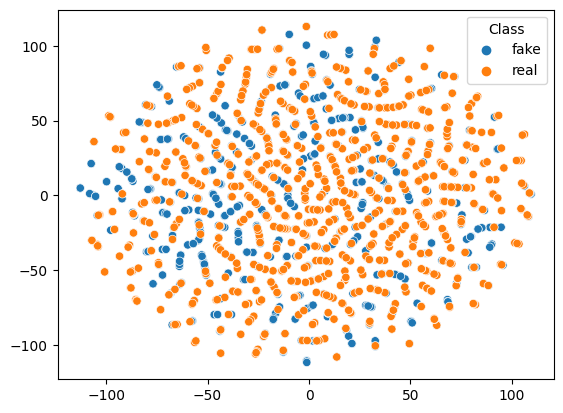

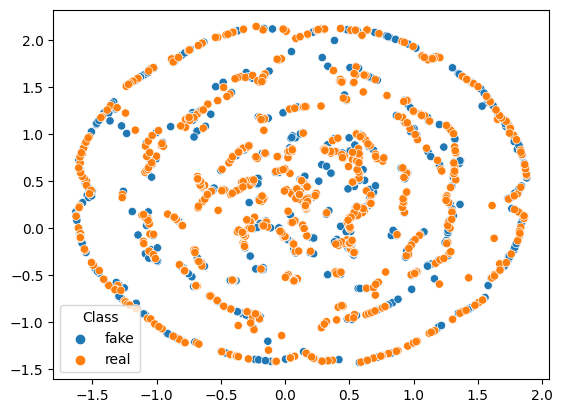

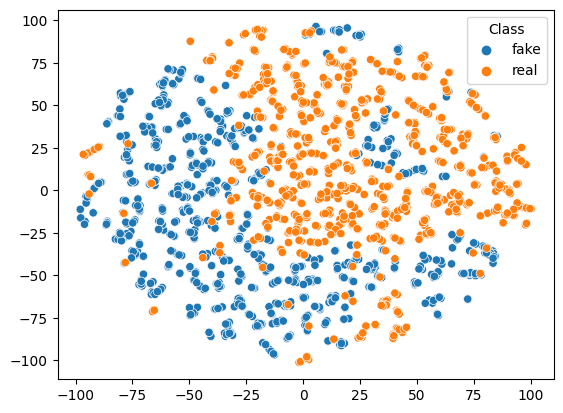

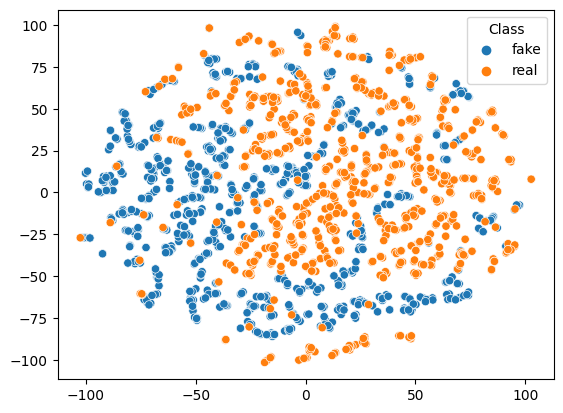

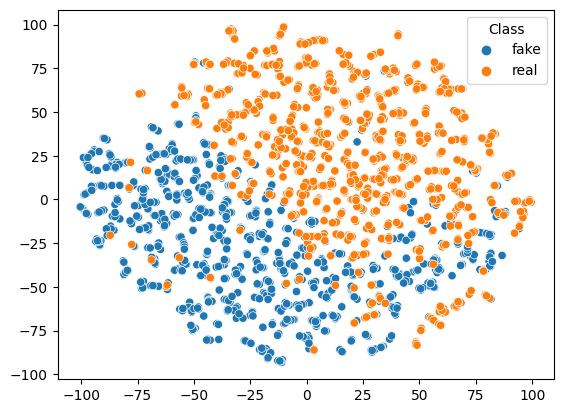

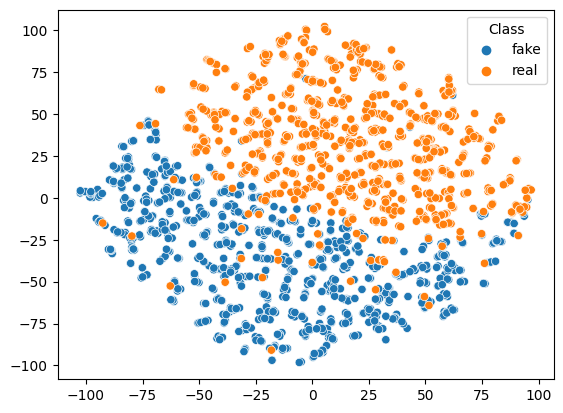

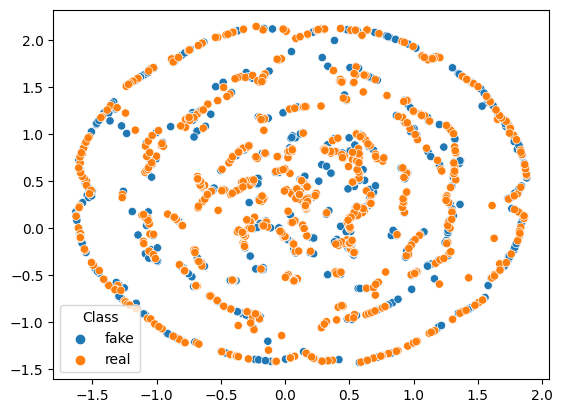

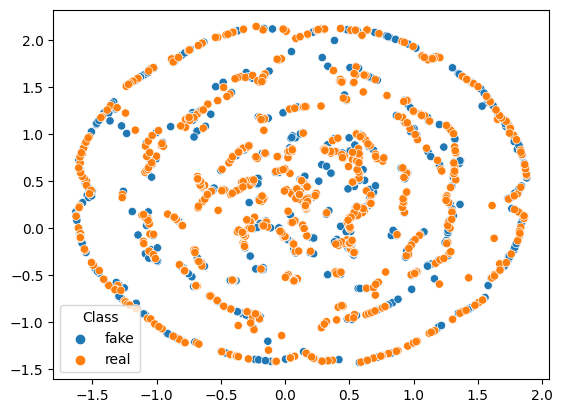

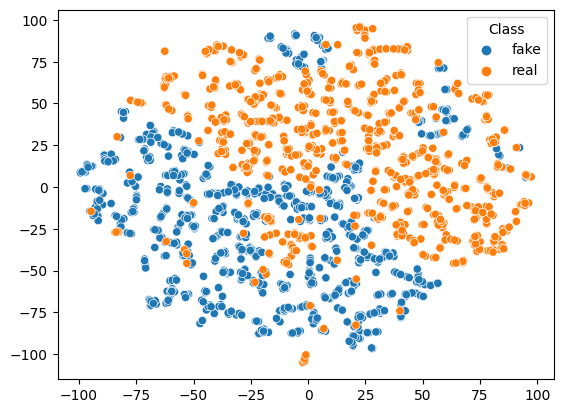

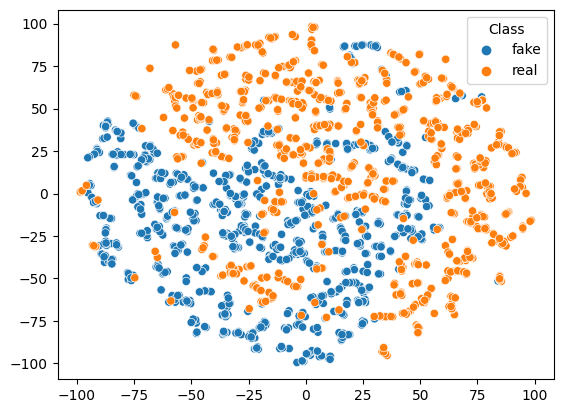

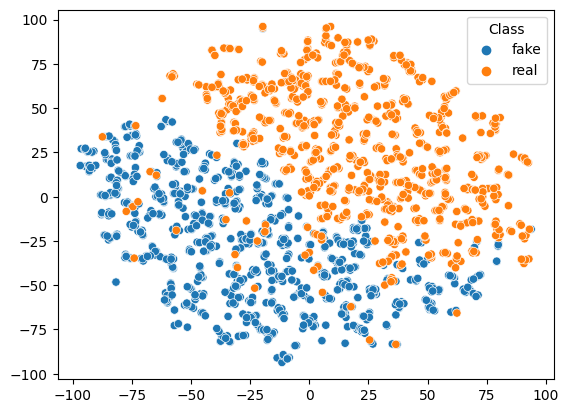

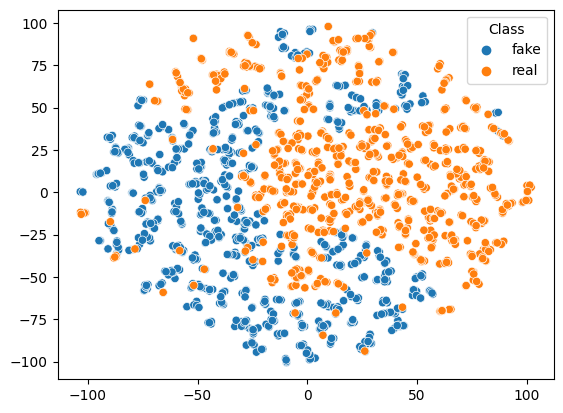

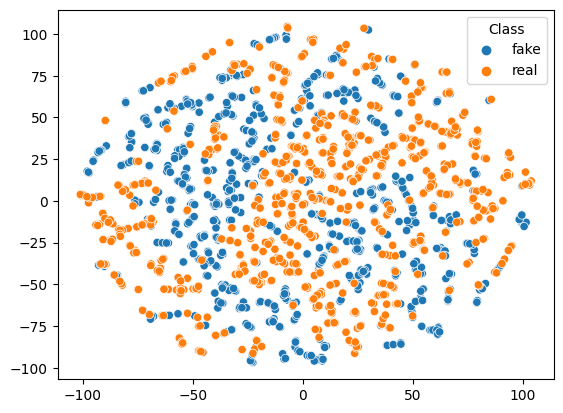

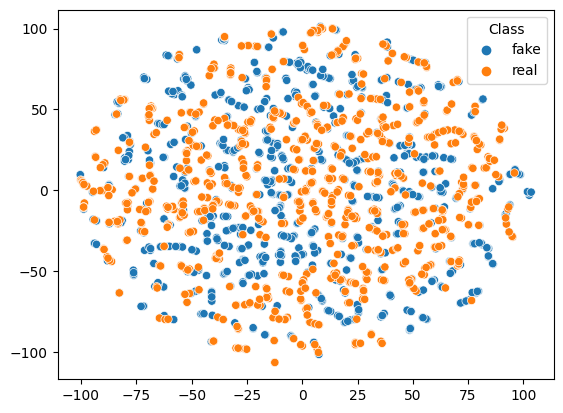

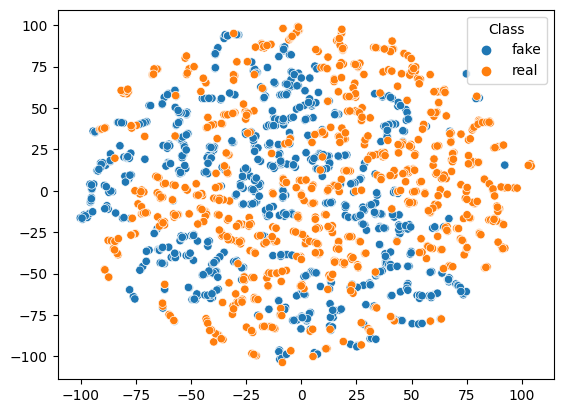

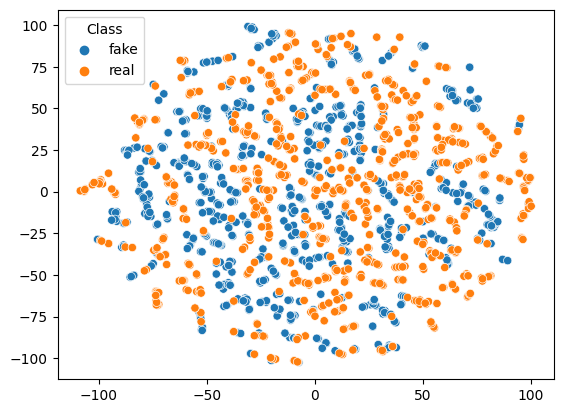

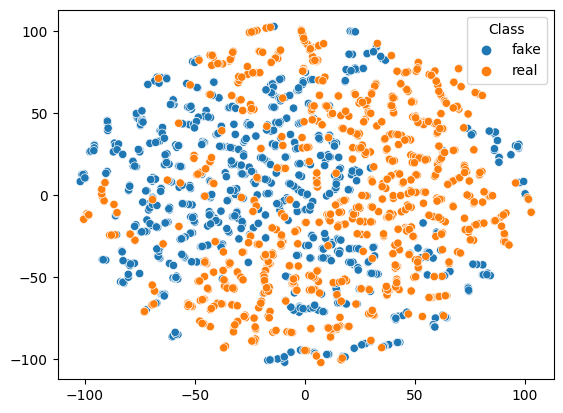

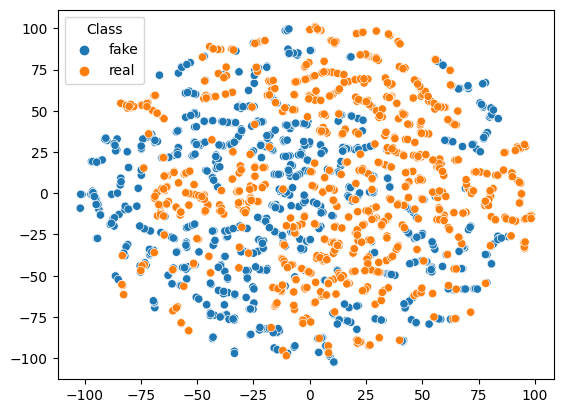

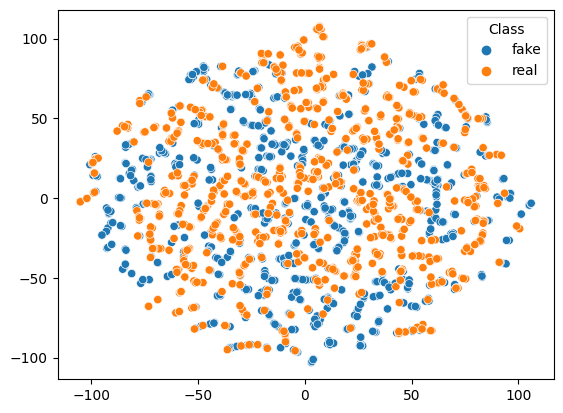

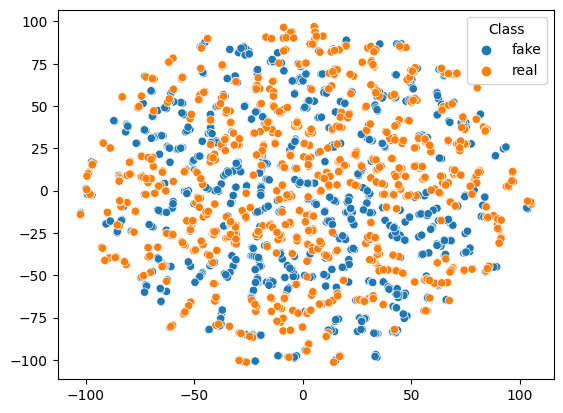

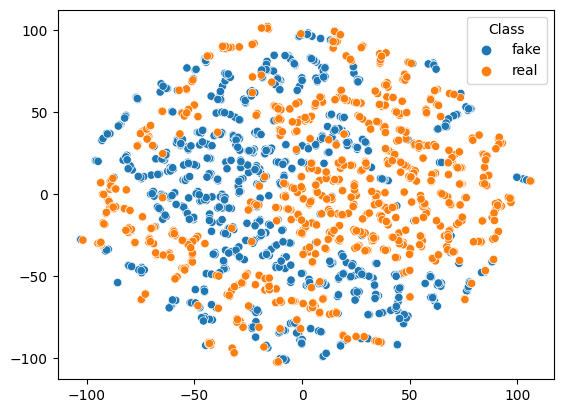

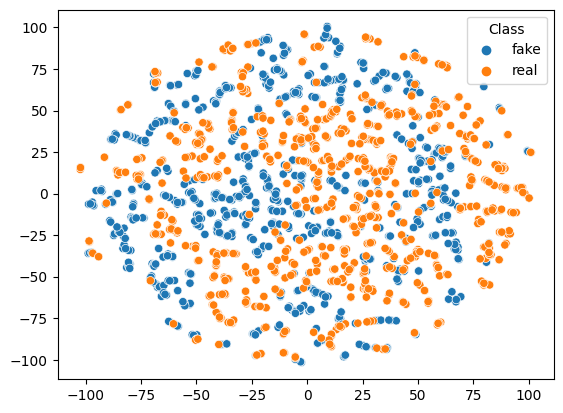

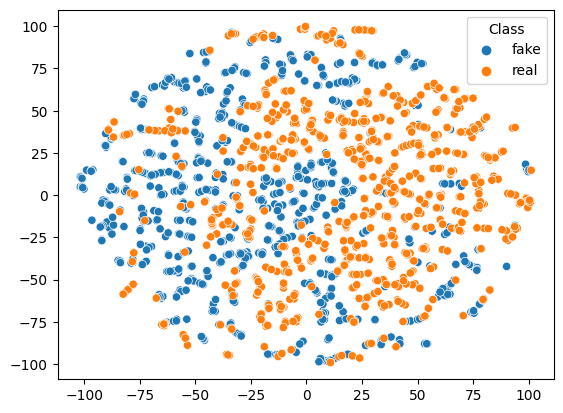

In [ ]:
for v in range(24):
  plot_tsne(v, 'multiply')